In [1]:
import numpy as np 
import pandas as pd
import os

In [2]:
train = pd.read_csv('../input/weather-dataset-rattle-package/weatherAUS.csv')

In [3]:
train['year'] = train['Date'].str[:4]  #This will get the first four letters from train..Nothing nothing
train['month'] = train['Date'].str[5:7]
train['day'] = train['Date'].str[8:10]
print(train['day'])

0         01
1         02
2         03
3         04
4         05
          ..
142188    20
142189    21
142190    22
142191    23
142192    24
Name: day, Length: 142193, dtype: object


In [4]:
train = train.drop('Date',axis=1)

In [5]:
train['windDirSame'] = 0 
train.loc[train['WindDir9am']==train['WindDir3pm'],'windDirSame'] = 1

In [6]:
#Wind Speed, Humidity, Pressure, Cloud, Temperature 
train['windDiff'] = train['WindSpeed9am'] - train['WindSpeed3pm']
train['humidityDiff'] = train['Humidity9am'] - train['Humidity3pm']
train['pressureDiff'] = train['Pressure9am'] - train['Pressure3pm']
train['CloudDiff'] = train['Cloud9am'] - train['Cloud3pm']
train['TempDiff'] = train['Temp9am'] - train['Temp3pm']

In [7]:
train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,RainTomorrow,year,month,day,windDirSame,windDiff,humidityDiff,pressureDiff,CloudDiff,TempDiff
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,No,2008,12,01,0,-4.0,49.0,0.6,NaN,-4.9
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,No,2008,12,02,0,-18.0,19.0,2.8,NaN,-7.1
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,No,2008,12,03,0,-7.0,8.0,-1.1,NaN,-2.2
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,No,2008,12,04,0,2.0,29.0,4.8,NaN,-8.4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,No,2008,12,05,0,-13.0,49.0,4.8,-1.0,-11.9


In [8]:
train['RainTomorrow'] = train['RainTomorrow'].astype('category').cat.codes
#train = pd.get_dummies(train)
train.shape

(142193, 32)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 32 columns):
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null object
RISK_MM          142193 non-null floa

In [10]:
train.fillna(0)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,RainTomorrow,year,month,day,windDirSame,windDiff,humidityDiff,pressureDiff,CloudDiff,TempDiff
0,Albury,13.4,22.9,0.6,0.0,0.0,W,44.0,W,WNW,...,0,2008,12,01,0,-4.0,49.0,0.6,0.0,-4.9
1,Albury,7.4,25.1,0.0,0.0,0.0,WNW,44.0,NNW,WSW,...,0,2008,12,02,0,-18.0,19.0,2.8,0.0,-7.1
2,Albury,12.9,25.7,0.0,0.0,0.0,WSW,46.0,W,WSW,...,0,2008,12,03,0,-7.0,8.0,-1.1,0.0,-2.2
3,Albury,9.2,28.0,0.0,0.0,0.0,NE,24.0,SE,E,...,0,2008,12,04,0,2.0,29.0,4.8,0.0,-8.4
4,Albury,17.5,32.3,1.0,0.0,0.0,W,41.0,ENE,NW,...,0,2008,12,05,0,-13.0,49.0,4.8,-1.0,-11.9
5,Albury,14.6,29.7,0.2,0.0,0.0,WNW,56.0,W,W,...,0,2008,12,06,1,-5.0,32.0,3.8,0.0,-8.3
6,Albury,14.3,25.0,0.0,0.0,0.0,W,50.0,SW,W,...,0,2008,12,07,0,-4.0,30.0,1.4,0.0,-6.5
7,Albury,7.7,26.7,0.0,0.0,0.0,W,35.0,SSE,W,...,0,2008,12,08,0,-11.0,29.0,3.3,0.0,-9.2
8,Albury,9.7,31.9,0.0,0.0,0.0,NNW,80.0,SE,NW,...,1,2008,12,09,0,-21.0,33.0,5.3,0.0,-11.9
9,Albury,13.1,30.1,1.4,0.0,0.0,W,28.0,S,SSE,...,0,2008,12,10,0,4.0,31.0,1.3,0.0,-8.1


In [11]:
train['Location'] = train['Location'].astype('category')
train['WindGustDir'] = train['WindGustDir'].astype('category')
train['WindDir9am'] = train['WindDir9am'].astype('category')
train['WindDir3pm'] = train['WindDir3pm'].astype('category')
train['RainToday'] = train['RainToday'].astype('category')
train['year'] = train['year'].astype('category')
train['month'] = train['month'].astype('category')
train['day'] = train['day'].astype('category')

In [12]:
train

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,RainTomorrow,year,month,day,windDirSame,windDiff,humidityDiff,pressureDiff,CloudDiff,TempDiff
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,0,2008,12,01,0,-4.0,49.0,0.6,NaN,-4.9
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,0,2008,12,02,0,-18.0,19.0,2.8,NaN,-7.1
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,0,2008,12,03,0,-7.0,8.0,-1.1,NaN,-2.2
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,0,2008,12,04,0,2.0,29.0,4.8,NaN,-8.4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,0,2008,12,05,0,-13.0,49.0,4.8,-1.0,-11.9
5,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,...,0,2008,12,06,1,-5.0,32.0,3.8,NaN,-8.3
6,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,...,0,2008,12,07,0,-4.0,30.0,1.4,NaN,-6.5
7,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,...,0,2008,12,08,0,-11.0,29.0,3.3,NaN,-9.2
8,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,...,1,2008,12,09,0,-21.0,33.0,5.3,NaN,-11.9
9,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,...,0,2008,12,10,0,4.0,31.0,1.3,NaN,-8.1


In [13]:
meanRain = train.loc[train['RISK_MM'] != 0]['RISK_MM'].mean()
medianRain = train.loc[train['RISK_MM'] != 0]['RISK_MM'].median()

print("Mean Rain",meanRain)
print("Median Rain",medianRain)

Mean Rain 6.566875342359574
Median Rain 2.2


In [14]:
#Let's divide the rain into 4 categories

#If Rain is above mean, then it will be high
#If the rain is between median and mean, it will be medium
#If the rain is below median but above 0 then light

#Make a new column named rain Category
train['rainCategory'] = 0
#If rain is light, assign it 1
train.loc[ (train['RISK_MM'] != 0) & (train['RISK_MM'] < medianRain)  ,'rainCategory'] = 1
#If rain is medium, assign it 2
train.loc[ (train['RISK_MM'] > medianRain) & (train['RISK_MM'] < meanRain)  ,'rainCategory'] = 2
#If rain is high, assign it 3
train.loc[train['RISK_MM'] > meanRain  ,'rainCategory'] = 3

In [15]:
X_train = train.loc[(train['year'] != '2016') & (train['year'] !=  '2017')]

test = train.loc[(train['year'] == '2016') | (train['year'] == '2017')]

In [16]:
test

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,year,month,day,windDirSame,windDiff,humidityDiff,pressureDiff,CloudDiff,TempDiff,rainCategory
2474,Albury,20.4,37.6,0.0,NaN,NaN,ENE,54.0,NaN,ESE,...,2016,01,01,0,-7.0,29.0,4.2,4.0,-10.6,1
2475,Albury,20.9,33.6,0.4,NaN,NaN,SSE,50.0,SSE,SE,...,2016,01,02,0,-8.0,24.0,2.7,0.0,-6.9,0
2476,Albury,18.4,23.1,2.2,NaN,NaN,ENE,48.0,ESE,ENE,...,2016,01,03,0,-28.0,-5.0,-0.8,0.0,2.3,3
2477,Albury,17.3,23.7,15.6,NaN,NaN,SSE,39.0,SE,SSE,...,2016,01,04,0,-8.0,9.0,1.4,0.0,-2.4,3
2478,Albury,15.5,22.9,6.8,NaN,NaN,ENE,31.0,SE,SSE,...,2016,01,05,0,-3.0,29.0,2.4,0.0,-5.0,1
2479,Albury,17.0,28.1,0.2,NaN,NaN,SE,39.0,SSE,ENE,...,2016,01,06,0,-2.0,24.0,2.0,0.0,-5.4,0
2480,Albury,16.4,28.0,0.0,NaN,NaN,SE,35.0,SE,ESE,...,2016,01,07,0,0.0,15.0,1.7,NaN,-5.7,0
2481,Albury,14.3,31.7,0.0,NaN,NaN,NNW,24.0,SSE,ENE,...,2016,01,08,0,5.0,39.0,2.4,NaN,-9.3,0
2482,Albury,16.7,35.0,0.0,NaN,NaN,WNW,28.0,E,SSE,...,2016,01,09,0,2.0,28.0,3.1,NaN,-8.9,0
2483,Albury,17.8,37.0,0.0,NaN,NaN,SSW,41.0,ESE,WNW,...,2016,01,10,0,-8.0,37.0,4.0,NaN,-10.0,0


In [17]:
train

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,year,month,day,windDirSame,windDiff,humidityDiff,pressureDiff,CloudDiff,TempDiff,rainCategory
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,2008,12,01,0,-4.0,49.0,0.6,NaN,-4.9,0
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,2008,12,02,0,-18.0,19.0,2.8,NaN,-7.1,0
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,2008,12,03,0,-7.0,8.0,-1.1,NaN,-2.2,0
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,2008,12,04,0,2.0,29.0,4.8,NaN,-8.4,1
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,2008,12,05,0,-13.0,49.0,4.8,-1.0,-11.9,1
5,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,...,2008,12,06,1,-5.0,32.0,3.8,NaN,-8.3,0
6,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,...,2008,12,07,0,-4.0,30.0,1.4,NaN,-6.5,0
7,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,...,2008,12,08,0,-11.0,29.0,3.3,NaN,-9.2,0
8,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,...,2008,12,09,0,-21.0,33.0,5.3,NaN,-11.9,1
9,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,...,2008,12,10,0,4.0,31.0,1.3,NaN,-8.1,0


In [18]:
y = X_train['rainCategory']
X_train = X_train.drop(['RainTomorrow','RISK_MM','rainCategory'],axis=1)

y_test = test['rainCategory'] 
test = test.drop(['RainTomorrow','RISK_MM','rainCategory'],axis=1)

In [19]:
import lightgbm as lgb
train_set = lgb.Dataset(X_train, label=y)
valid_set = lgb.Dataset(test, label=y_test)

In [20]:
params = { 
        "objective" : "multiclass", 
        "metric" : "multi_error",  
        "learning_rate" : 0.03,
        'num_class':4
}
evals_result = {}  # to record eval results for plotting

model = lgb.train(  params, 
                    train_set = train_set, 
                    num_boost_round=10000, 
                    early_stopping_rounds=200, 
                    verbose_eval=100, 
                    evals_result=evals_result,
                    valid_sets=[train_set,valid_set]
                  )
model.save_model('model.txt')

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 200 rounds.
[100]	training's multi_error: 0.279842	valid_1's multi_error: 0.296142
[200]	training's multi_error: 0.262504	valid_1's multi_error: 0.287172
[300]	training's multi_error: 0.250364	valid_1's multi_error: 0.287364
[400]	training's multi_error: 0.241088	valid_1's multi_error: 0.286902
[500]	training's multi_error: 0.233542	valid_1's multi_error: 0.28721
Early stopping, best iteration is:
[375]	training's multi_error: 0.243187	valid_1's multi_error: 0.286594


In [1]:
import matplotlib.pyplot as plt

In [2]:
features_label = X_train.columns
featureImp = list(model.feature_importance())
featureImp, features_label = zip(*sorted(zip(featureImp, features_label)))
with open("FeatureImportance.txt", "w") as text_file:
    for i in range(len(featureImp)):
        print(f"{features_label[i]} =  {featureImp[i]}", file=text_file)


NameError: name 'X_train' is not defined

Plotting metrics recorded during training...


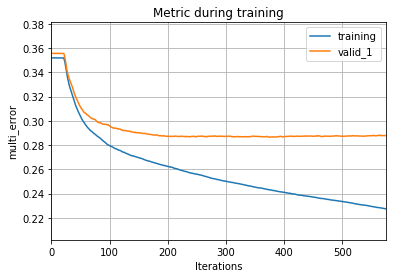

Plotting feature importances...


<Figure size 14400x14400 with 0 Axes>

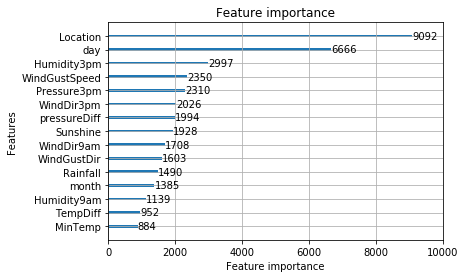

In [23]:
print('Plotting metrics recorded during training...')
ax = lgb.plot_metric(evals_result, metric='multi_error')
plt.show()
plt.figure(figsize=(200,200))
print('Plotting feature importances...')
ax = lgb.plot_importance(model, max_num_features=15)
plt.show()

In [24]:
from sklearn.metrics import accuracy_score
pred = model.predict(test)
pred = np.argmax(pred,axis=1)
print(accuracy_score(y_test, pred))

0.7127897127897128


In [25]:
test['actualPrediction'] = y_test
test['prediction'] = pred

In [26]:
test.to_csv('testfile2.csv',index=False)
test

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,month,day,windDirSame,windDiff,humidityDiff,pressureDiff,CloudDiff,TempDiff,actualPrediction,prediction
2474,Albury,20.4,37.6,0.0,NaN,NaN,ENE,54.0,NaN,ESE,...,01,01,0,-7.0,29.0,4.2,4.0,-10.6,1,0
2475,Albury,20.9,33.6,0.4,NaN,NaN,SSE,50.0,SSE,SE,...,01,02,0,-8.0,24.0,2.7,0.0,-6.9,0,0
2476,Albury,18.4,23.1,2.2,NaN,NaN,ENE,48.0,ESE,ENE,...,01,03,0,-28.0,-5.0,-0.8,0.0,2.3,3,1
2477,Albury,17.3,23.7,15.6,NaN,NaN,SSE,39.0,SE,SSE,...,01,04,0,-8.0,9.0,1.4,0.0,-2.4,3,0
2478,Albury,15.5,22.9,6.8,NaN,NaN,ENE,31.0,SE,SSE,...,01,05,0,-3.0,29.0,2.4,0.0,-5.0,1,0
2479,Albury,17.0,28.1,0.2,NaN,NaN,SE,39.0,SSE,ENE,...,01,06,0,-2.0,24.0,2.0,0.0,-5.4,0,0
2480,Albury,16.4,28.0,0.0,NaN,NaN,SE,35.0,SE,ESE,...,01,07,0,0.0,15.0,1.7,NaN,-5.7,0,0
2481,Albury,14.3,31.7,0.0,NaN,NaN,NNW,24.0,SSE,ENE,...,01,08,0,5.0,39.0,2.4,NaN,-9.3,0,0
2482,Albury,16.7,35.0,0.0,NaN,NaN,WNW,28.0,E,SSE,...,01,09,0,2.0,28.0,3.1,NaN,-8.9,0,0
2483,Albury,17.8,37.0,0.0,NaN,NaN,SSW,41.0,ESE,WNW,...,01,10,0,-8.0,37.0,4.0,NaN,-10.0,0,0
